In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import csv

In [9]:
row_start = 14

In [54]:
# metadata = dict()
filename = "1B - Adrian.CSV"
with open(filename, newline='') as csvfile:
    reader = csv.reader(csvfile)

In [55]:
data = pd.read_csv(filename, delimiter=",", header=row_start)
data

,TIME,CH1,CH1 Peak Detect,CH2,CH2 Peak Detect
0,-2.00000,9.92,10.00,2.93,2.97
1,-1.99997,9.92,9.76,2.93,2.87
2,-1.99994,9.92,10.00,2.93,2.97
3,-1.99990,9.92,9.76,2.93,2.87
4,-1.99987,9.84,10.00,2.93,2.97
...,...,...,...,...,...
124995,1.99984,9.92,9.76,2.83,2.77
124996,1.99987,9.92,10.00,2.83,2.87
124997,1.99990,9.92,9.76,2.85,2.79
124998,1.99994,9.92,10.00,2.81,2.87


In [56]:
t = data["TIME"]
ch1 = data["CH1"]
ch2 = data["CH2"]
t = t[ch1 < 1]
ch2 = ch2[ch1 < 1]

Text(0.5, 0, 'Time (s)')

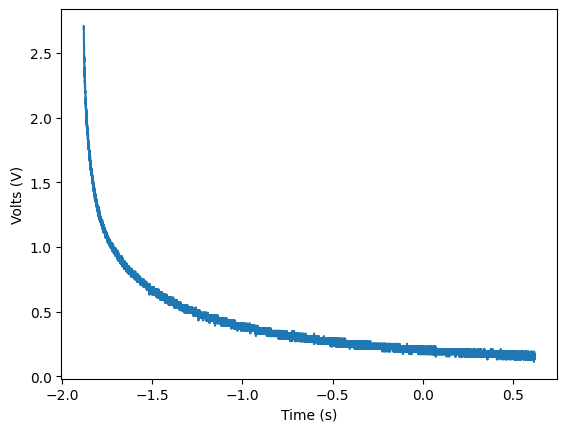

In [57]:
plt.plot(t, ch2)
plt.ylabel("Volts (V)")
plt.xlabel("Time (s)")

-0.3313852618753183 0.39090307522178735 0.697476824674354 4.809197318439695


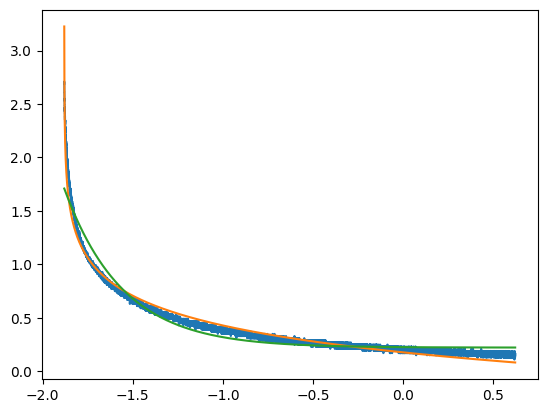

In [63]:
model = lambda t, A, RC, z, B: A * np.log(t/RC+B) + z
model2 = lambda t, A, RC, z: A * np.exp(-t/RC) + z
[A_model, RC_model, z_model, B_model], cov = sp.optimize.curve_fit(model, t, ch2, p0=[0.3, 1.1, 0.2, 10])
[A_model2, RC_model2, z_model2], cov2 = sp.optimize.curve_fit(model2, t, ch2, p0=[0.3, 1.1, 0.2])
plt.plot(t, ch2)
plt.plot(t, model(t, A_model, RC_model, z_model, B_model))
plt.plot(t, model2(t, A_model2, RC_model2, z_model2))
print(A_model, RC_model, z_model, B_model)